In [1]:
# =========
# Load Data
# =========
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")

df_repos = pd.read_csv('data/repos.csv')
df_prs = pd.read_csv('data/prs.csv')
df_issues = pd.read_csv('data/issues.csv')  

In [2]:
# sum and group pr_count by name and year then sort by pr_count
df_prs_grouped_by_language = df_prs.groupby(['name']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()
df_prs_grouped_by_year = df_prs.groupby(['name', 'year']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()

In [3]:
# sum and group issues_count by name and year then sort by issues_count
df_issues_grouped_by_language = df_issues.groupby(['name']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()
df_issues_grouped_by_year = df_issues.groupby(['name', 'year']).agg({'count': 'sum'}).sort_values(by='count', ascending=False).reset_index()

# What are the most popular languages overall?

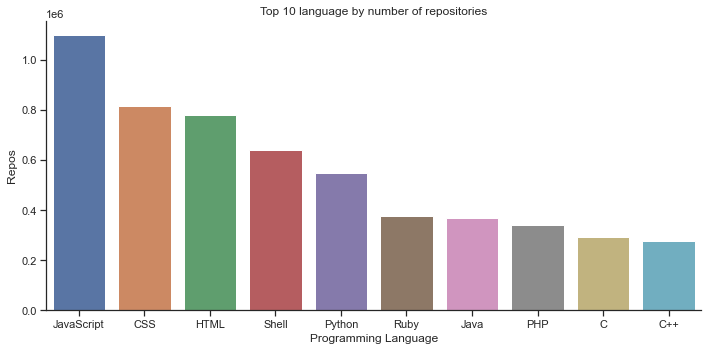

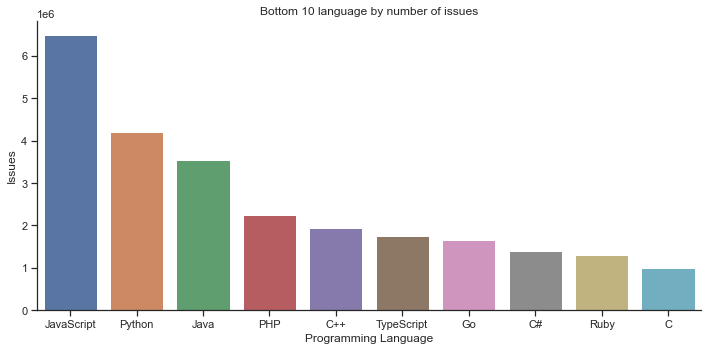

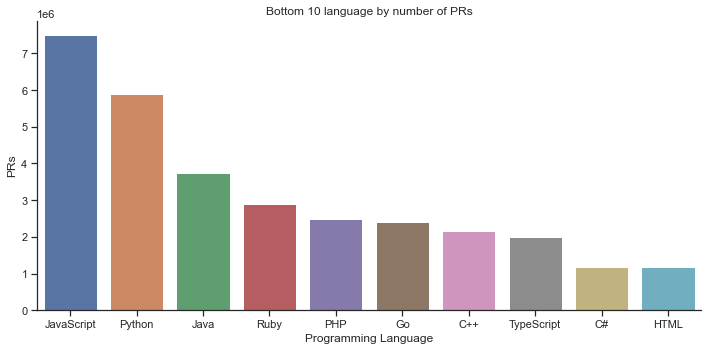

In [4]:
# if you use repos here's the top 10...
sns.catplot(x="language", y="num_repos",
                             kind="bar",
                             height=5, aspect=2,
                             data=df_repos.head(10)).set(title=f"Top 10 language by number of repositories").set_xlabels("Programming Language").set_ylabels("Repos")
# if you use issues here's the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_issues_grouped_by_language.head(10)).set(title=f"Bottom 10 language by number of issues").set_xlabels("Programming Language").set_ylabels("Issues")
# if you use issues here is the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_prs_grouped_by_language.head(10)).set(title=f"Bottom 10 language by number of PRs").set_xlabels("Programming Language").set_ylabels("PRs")


### Results:
We can assume from this that the over-all popularity of Javascript by repo count is very important.
While we cannot be sure of repo count at earlier years due to the lack of quarter and yearly repo data we can still tell that Javascript simply has a lot of code moving around.

Looking at the second and third charts we can see Javascript is first place for both other metrics (over all time).  

An interesting result is Python, which is second place in PRs and Issues but a much lower number of repos, less than half, of Javascript. 
Does this mean Python is more open, collaborative language than Javascript?  

# What were the most popular languages at the earliest data point?

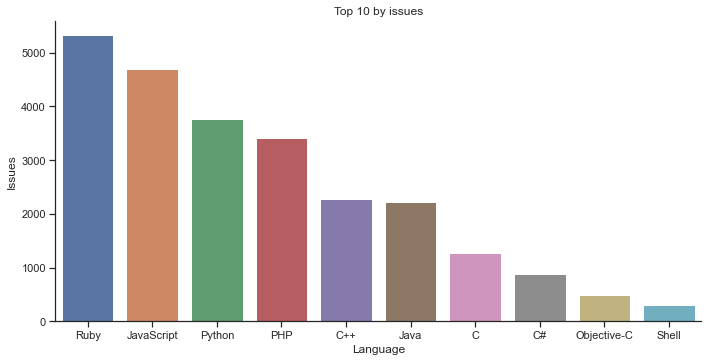

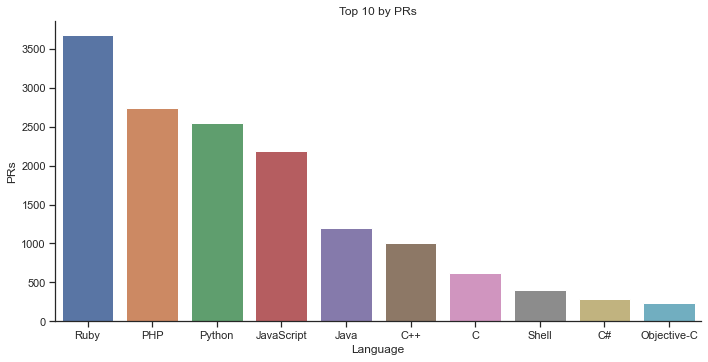

In [5]:
df_issues_2011 = df_issues_grouped_by_year[df_issues_grouped_by_year['year'] == 2011]
df_prs_2011 = df_prs_grouped_by_year[df_prs_grouped_by_year['year'] == 2011]

sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_issues_2011.head(10)).set(title=f"Top 10 by issues").set_xlabels("Language").set_ylabels("Issues")
# if you use issues here is the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_prs_2011.head(10)).set(title=f"Top 10 by PRs").set_xlabels("Language").set_ylabels("PRs")


### Results
At the earliest point of our data Ruby is near the top of our language list in terms of both PRs and Issues.  At the time Ruby as well as PHP were very popular languages and were used primarily for web development.  Which was booming in 2011.  We can see Javascript AND python still in the top 5 during this period but they are both much less popular than today.

# What were the most popular languages at the most recent data point?

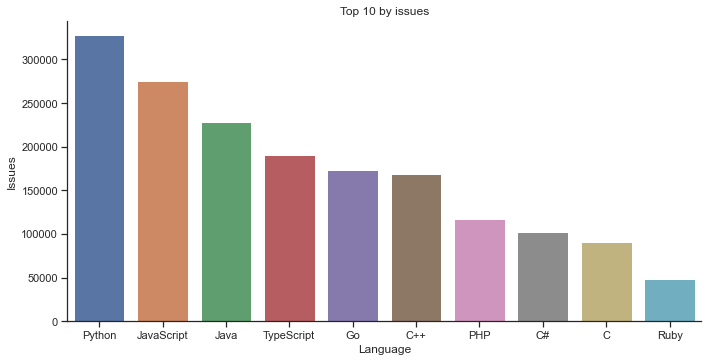

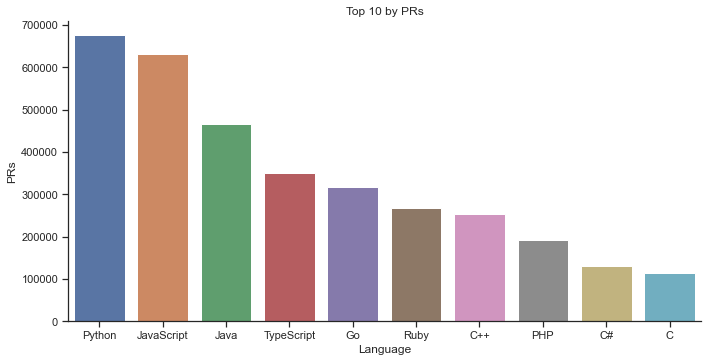

In [6]:
df_issues_2021 = df_issues_grouped_by_year[df_issues_grouped_by_year['year'] == 2021]
df_prs_2021 = df_prs_grouped_by_year[df_prs_grouped_by_year['year'] == 2021]

#I'm not doing 2022 here because the year has just begun.

sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_issues_2021.head(10)).set(title=f"Top 10 by issues").set_xlabels("Language").set_ylabels("Issues")
# if you use issues here is the top 10...
sns.catplot(x="name", y="count",
                              kind="bar",
                              height=5, aspect=2,
                              data=df_prs_2021.head(10)).set(title=f"Top 10 by PRs").set_xlabels("Language").set_ylabels("PRs")


### Results
Currently 2021 shows us that Python has actually overtaken javascript for popularity.  While not much has experienced the meteoric rise Javascript has we can also see that Javascript has cooled down enough for Python to overtake it.  

# What languages have grown the fastest?
# What languages have stayed high in popularity the longest?

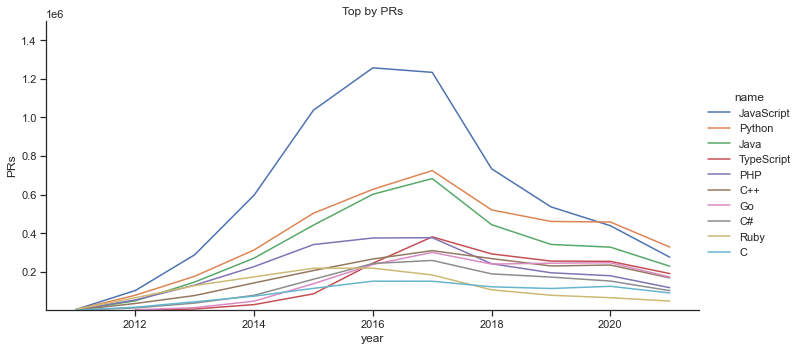

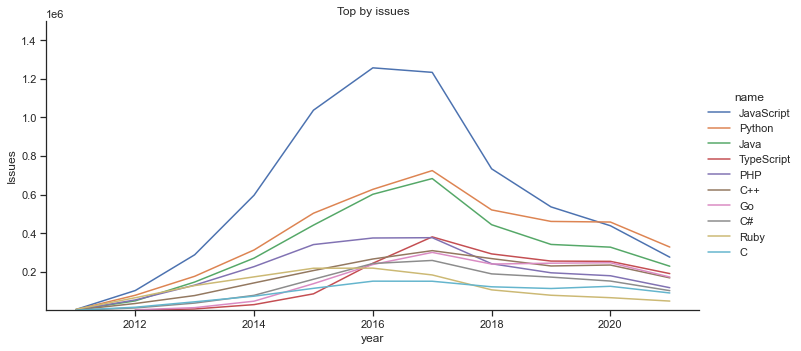

In [7]:
df_top_prs = df_prs.groupby(["name"]).agg({'count': 'sum'}).sort_values("count", ascending=0).head(10).reset_index()["name"].unique()
df_top_pr_grouped = df_prs_grouped_by_year[df_prs_grouped_by_year['name'].isin(df_top_prs)]

df_top_issues = df_issues.groupby(["name"]).agg({'count': 'sum'}).sort_values("count", ascending=0).head(10).reset_index()["name"].unique()
df_top_pr_grouped = df_issues_grouped_by_year[df_issues_grouped_by_year['name'].isin(df_top_issues)]

sns.relplot(x="year", y="count", 
                         kind="line",
                         hue="name",
                         height=5, aspect=2,
                         data=df_top_pr_grouped).set(title="Top by PRs").set(ylim=(500, 1500000)).set_ylabels("PRs")


sns.relplot(x="year", y="count", 
                         kind="line",
                         hue="name",
                         height=5, aspect=2,
                         data=df_top_pr_grouped).set(title="Top by issues").set(ylim=(500, 1500000)).set_ylabels("Issues")

### RESULTS
We can see on these charts just how extreme Javascripts rise and apparent fall have been.  Python has ridden the close second place for a long time.  And now we finally see python gaining enough and Javascript losing enough momentum for their positions to switch.  This being said the stickiness of Java is commendable, though it's to be expected for a language where the JVM (Java Virtual Machine) has had well over a billion dollars of investment in it.

# If we had to pick a language to learn which one should we do?

### RESULTS
Taking in all the data we have seen and exposed, we can see that Javascript is still a mainstay in our development lifecycle, if it's not NODE it's something along the lines of REACT or NEXTJS.  While Python having become the de facto tool of data scientists and data engineers of all shapes and sizes (Tesla, CommaAI, Google, etc.) is one likely point of growth making Python the now most popular choice.

Javascript has had the most popular moniker for some time and would definitely be a solid choice for a new engineer due to the maturity of the tooling, the language as a whole, and the ability to use the same language cross stack as well as in the browser.

Python would be my second choice, not just due to the use in data science but as time goes it it's apparent Python will continue to grow.  With the shift to Python 3 (finally!) the package ecosystem is slowly growing to be more and more mature.  I can easily see pythons popularity to continue to grow.

In short, Python is my top recommendation for a new engineer but Javascript is a very close second.
